In [1]:
import re
import pandas as pd
import pyttsx3
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,_tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import csv

import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

from nltk.stem import WordNetLemmatizer
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
training = pd.read_csv('Data/Training.csv')
testing= pd.read_csv('Data/Testing.csv')

In [3]:
training.head(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
cols= training.columns
cols= cols[:-1]
cols

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

In [5]:
x = training[cols]
y = training['prognosis']
y1= y
y1

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [6]:
reduced_data = training.groupby(training['prognosis']).max()
reduced_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIDS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acne,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
Alcoholic hepatitis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allergy,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arthritis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bronchial Asthma,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cervical spondylosis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chicken pox,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
y

array([15, 15, 15, ..., 38, 35, 27])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
testx    = testing[cols]
testy    = testing['prognosis']  
testy    = le.transform(testy)
testy

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27])

In [9]:
clf1  = DecisionTreeClassifier()
clf = clf1.fit(x_train,y_train)
scores = cross_val_score(clf, x_test, y_test, cv=5)
print (scores)

[0.98461538 0.98461538 0.98769231 0.98153846 0.9845679 ]


In [10]:
print (scores.mean())

0.9846058879392213


In [11]:
model=SVC()
rf_clf = model.fit(x_train,y_train)
print("for svm: ")
print(model.score(x_test,y_test))

for svm: 
1.0


In [12]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = cols

In [13]:
ydf = pd.read_csv('Yes-noData/yes-no-dataset.csv')

<AxesSubplot:xlabel='label', ylabel='Count'>

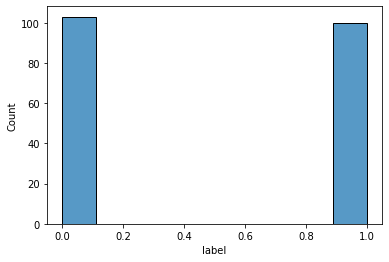

In [14]:
sns.histplot(ydf.label)

In [15]:
ydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      203 non-null    int64 
 1   text    203 non-null    object
 2   label   203 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.9+ KB


In [16]:
#sum of null values

np.sum(ydf.isnull().any(axis=1))

0

In [17]:
#counting unique attributes
ydf.nunique()

id       203
text     135
label      2
dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

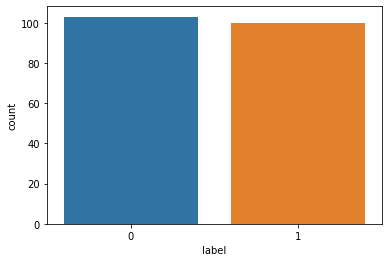

In [18]:
sns.countplot(x='label', data=ydf)

In [19]:
yes_Count = 0
no_Count = 0
for i in range(len(ydf)):
    if ydf.label[i] == 0:
        yes_Count = yes_Count + 1
    else:
        no_Count = no_Count + 1
        
yes_Count,no_Count

(103, 100)

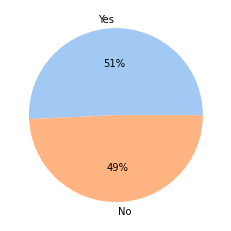

In [20]:
#define data
yndata = [yes_Count,no_Count] 
labels = ['Yes', 'No']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(yndata, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [21]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [22]:
# remove short words
ydf['clean_text'] = ydf['text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>1]))
tokenized_text = ydf['clean_text'].apply(lambda x: x.split())

for i in range(len(tokenized_text)):
    tokenized_text[i] = " ".join(tokenized_text[i])
    
ydf['clean_text'] = tokenized_text

In [23]:
ydf['clean_text'].head(10)


0          yes have
1          no don't
2         sure have
3    have it almost
4       highly have
5      Yes its good
6         sure have
7       surely have
8           no dont
9            am not
Name: clean_text, dtype: object

In [24]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000)
bow = bow_vectorizer.fit_transform(ydf['clean_text'])
bow.toarray()

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, ydf['label'], random_state=42, test_size=0.20)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [27]:
#LogisticRegression
ylr_model = LogisticRegression()
ylr_model.fit(x_train, y_train)
pred= ylr_model.predict(x_test)

In [28]:
def yesNoPredictor(text):
    ndata= {'text':[text]}
    ydf_n= pd.DataFrame(ndata)

    testing_text = bow_vectorizer.transform(ydf_n['text'])
    testing_text.toarray()

    pred_text = ylr_model.predict(testing_text)
    return pred_text

In [29]:
text = "maybe i have"

pred_text = yesNoPredictor(text)

if (pred_text == 0):
    print('Yes')

Yes


In [30]:
text = "I do not have"

pred_text = yesNoPredictor(text)

if (pred_text == 1):
    print('No')

No


In [31]:
def readn(nstr):
    engine = pyttsx3.init()

    engine.setProperty('voice', "english+f5")
    engine.setProperty('rate', 130)

    engine.say(nstr)
    engine.runAndWait()
    engine.stop()


severityDictionary=dict()
description_list = dict()
precautionDictionary=dict()

symptoms_dict = {}

In [32]:
for index, symptom in enumerate(x):
       symptoms_dict[symptom] = index

In [33]:
def calc_condition(exp,days):
    sum=0
    for item in exp:
         sum=sum+severityDictionary[item]
    if((sum*days)/(len(exp)+1)>13):
        print("You should take the consultation from doctor. ")
    else:
        print("It might not be that bad but you should take precautions.")

In [34]:
def getDescription():
    global description_list
    with open('MasterData/symptom_Description.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _description={row[0]:row[1]}
            description_list.update(_description)

In [35]:
def getSeverityDict():
    global severityDictionary
    with open('MasterData/symptom_severity.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        try:
            for row in csv_reader:
                _diction={row[0]:int(row[1])}
                severityDictionary.update(_diction)
        except:
            pass

In [36]:
def getprecautionDict():
    global precautionDictionary
    with open('MasterData/symptom_precaution.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _prec={row[0]:[row[1],row[2],row[3],row[4]]}
            precautionDictionary.update(_prec)

In [37]:
def getInfo():
    print("-----------------------------------HealthCare ChatBot-----------------------------------")
    print("\nYour Name? \t\t\t\t",end="->")
    name=input("")
    print("Hello, ",name)

In [38]:
def check_pattern(dis_list,inp):
    pred_list=[]
    inp=inp.replace(' ','_')
    patt = f"{inp}"
    regexp = re.compile(patt)
    pred_list=[item for item in dis_list if regexp.search(item)]
    if(len(pred_list)>0):
        return 1,pred_list
    else:
        return 0,[]

In [39]:
def sec_predict(symptoms_exp):
    df = pd.read_csv('Data/Training.csv')
    X = df.iloc[:, :-1]
    y = df['prognosis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
    rf_clf = DecisionTreeClassifier()
    rf_clf.fit(X_train, y_train)

    symptoms_dict = {symptom: index for index, symptom in enumerate(X)}
    input_vector = np.zeros(len(symptoms_dict))
    for item in symptoms_exp:
      input_vector[[symptoms_dict[item]]] = 1

    return rf_clf.predict([input_vector])

In [40]:
def print_disease(node):
    node = node[0]
    val  = node.nonzero() 
    disease = le.inverse_transform(val[0])
    return list(map(lambda x:x.strip(),list(disease)))

In [41]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    chk_dis=",".join(feature_names).split(",")
    symptoms_present = []

    while True:

        print("\nEnter the symptom you are experiencing  \t\t",end="->")
        disease_input = input("")
        conf,cnf_dis=check_pattern(chk_dis,disease_input)
        if conf==1:
            print("searches related to input: ")
            for num,it in enumerate(cnf_dis):
                print(num,")",it)
            if num!=0:
                print(f"Select the one you meant (0 - {num}):  ", end="")
                conf_inp = int(input(""))
            else:
                conf_inp=0

            disease_input=cnf_dis[conf_inp]
            break
            # print("Did you mean: ",cnf_dis,"?(yes/no) :",end="")
            # conf_inp = input("")
            # if(conf_inp=="yes"):
            #     break
        else:
            print("Enter valid symptom.")

    while True:
        try:
            num_days=int(input("Okay. From how many days ? : "))
            break
        except:
            print("Enter valid input.")
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]

            if name == disease_input:
                val = 1
            else:
                val = 0
            if  val <= threshold:
                recurse(tree_.children_left[node], depth + 1)
            else:
                symptoms_present.append(name)
                recurse(tree_.children_right[node], depth + 1)
        else:
            present_disease = print_disease(tree_.value[node])
            # print( "You may have " +  present_disease )
            red_cols = reduced_data.columns 
            symptoms_given = red_cols[reduced_data.loc[present_disease].values[0].nonzero()]
            # dis_list=list(symptoms_present)
            # if len(dis_list)!=0:
            #     print("symptoms present  " + str(list(symptoms_present)))
            # print("symptoms given "  +  str(list(symptoms_given)) )
            print("Are you experiencing any ")
            symptoms_exp=[]
            for syms in list(symptoms_given):
                #inp=""
                print(syms,"? : ",end='')
                while True:
                    inpt=input("")
                    inp= yesNoPredictor(inpt)
                    if(inp==0 or inp==1):
                        break
                    else:
                        print("provide proper answers i.e. (yes/no) : ",end="")
                if(inp==0):
                    symptoms_exp.append(syms)

            second_prediction=sec_predict(symptoms_exp)
            # print(second_prediction)
            calc_condition(symptoms_exp,num_days)
            if(present_disease[0]==second_prediction[0]):
                print("You may have ", present_disease[0])
                print(description_list[present_disease[0]])

                # readn(f"You may have {present_disease[0]}")
                # readn(f"{description_list[present_disease[0]]}")

            else:
                print("You may have ", present_disease[0], "or ", second_prediction[0])
                print(description_list[present_disease[0]])
                print(description_list[second_prediction[0]])

            # print(description_list[present_disease[0]])
            precution_list=precautionDictionary[present_disease[0]]
            print("Take following measures : ")
            for  i,j in enumerate(precution_list):
                print(i+1,")",j)

            # confidence_level = (1.0*len(symptoms_present))/len(symptoms_given)
            # print("confidence level is " + str(confidence_level))

    recurse(0, 1)

In [42]:
getSeverityDict()
getDescription()
getprecautionDict()
getInfo()
tree_to_code(clf,cols)
print("----------------------------------------------------------------------------------------")

-----------------------------------HealthCare ChatBot-----------------------------------

Your Name? 				->shaad
Hello,  shaad

Enter the symptom you are experiencing  		->fever
searches related to input: 
0 ) high_fever
1 ) mild_fever
Select the one you meant (0 - 1):  0
Okay. From how many days ? : 20
Are you experiencing any 
fatigue ? : no
cramps ? : maybe
bruising ? : i have
obesity ? : no
swollen_legs ? : maybe i have
swollen_blood_vessels ? : no
prominent_veins_on_calf ? : maybe
You should take the consultation from doctor. 
You may have  Varicose veins
A vein that has enlarged and twisted, often appearing as a bulging, blue blood vessel that is clearly visible through the skin. Varicose veins are most common in older adults, particularly women, and occur especially on the legs.
Take following measures : 
1 ) lie down flat and raise the leg high
2 ) use oinments
3 ) use vein compression
4 ) dont stand still for long
---------------------------------------------------------------